# TOC
1. Importing libraries & data   
2. Appending population data onto liquor data   
3. Creating subset from data removing all categorical columns   
4. Creating correlation matrix & heatmap   
5. Creating scatterplots   
6. Creating pair plot   


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
# Version check
matplotlib.__version__

'3.7.1'

In [3]:
# Defining option
%matplotlib inline

In [4]:
# Importing liquor sales data
path = r'C:\Users\Ryzen RGB Madness!!!\Iowa Liquor Sales Analysis'

In [5]:
liquor_data_complete = pd.read_pickle(os.path.join(path, '01 - Data', 'Cleaned', 'iowa_liquor_data_complete.pkl'))

In [6]:
# Importing Iowa county population data
pop_data = pd.read_csv(os.path.join(path, '01 - Data', 'Original', 'iowa population.csv'))

In [7]:
pop_data.head()

,County,Average Pop
0,Adair,"7,509"
1,Adams,"3,654"
2,Allamakee,"13,999"
3,Appanoose,"12,215"
4,Audubon,"5,648"


In [8]:
# Renaming population data columns
pop_data.rename(columns={'County':'county', 'Average Pop':'population'}, inplace=True)

In [9]:
pop_data.head()

,county,population
0,Adair,"7,509"
1,Adams,"3,654"
2,Allamakee,"13,999"
3,Appanoose,"12,215"
4,Audubon,"5,648"


In [10]:
pop_data.dtypes

county        object
population    object
dtype: object

In [11]:
# Updating county population column to match liquor data
pop_data['county'] = pop_data['county'].str.upper()

In [12]:
pop_data.head()

,county,population
0,ADAIR,"7,509"
1,ADAMS,"3,654"
2,ALLAMAKEE,"13,999"
3,APPANOOSE,"12,215"
4,AUDUBON,"5,648"


In [13]:
# Removing comma from population columns (prep to convert to int)
pop_data['population'] = pop_data['population'].str.replace(",","")

In [14]:
pop_data.head()

,county,population
0,ADAIR,7509
1,ADAMS,3654
2,ALLAMAKEE,13999
3,APPANOOSE,12215
4,AUDUBON,5648


In [15]:
# Checking for nulls
pop_data.isnull().sum()

county        0
population    5
dtype: int64

In [16]:
# Testing nulls theory (data citation at end of dataset)
pop_data.tail(10)

,county,population
94,WINNEBAGO,10648
95,WINNESHIEK,19975
96,WOODBURY,105797
97,WORTH,7378
98,WRIGHT,12802
99,NOTE: THE ESTIMATES ARE DEVELOPED FROM A BASE ...,NaN
100,SUGGESTED CITATION:,NaN
101,ANNUAL ESTIMATES OF THE RESIDENT POPULATION FO...,NaN
102,"SOURCE: U.S. CENSUS BUREAU, POPULATION DIVISION",NaN
103,RELEASE DATE: MARCH 2023,NaN


In [17]:
# Removing nulls from dataframe
pop_data = pop_data.dropna(axis=0,subset=['population'])

In [18]:
# Converting population column to int
pop_data['population'] = pop_data['population'].astype(int)

In [19]:
pop_data.dtypes

county        object
population     int32
dtype: object

In [20]:
# Merging population data into liquor data
liquor_data_full = liquor_data_complete.merge(pop_data[['county','population']],left_on=['county'],right_on=['county'],how='left')

In [21]:
# Checking new dataframe
liquor_data_full.shape

(12537545, 23)

In [22]:
# Any nulls?
liquor_data_full.isnull().sum()

invoice_number         0
date                   0
store_number           0
store_name             0
address                0
city                   0
zip_code               0
county                 0
category               0
category_name          0
vendor_number          0
vendor_name            0
item_number            0
item_description       0
pack                   0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
population             2
dtype: int64

In [23]:
# Separating population nulls
pop_nulls = liquor_data_full[liquor_data_full['population'].isnull()==True]

In [24]:
pop_nulls.head()

,invoice_number,date,store_number,store_name,address,city,zip_code,county,category,category_name,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,population
10997601,INV-09867400001,2018-01-18,9936,DASH EVENTS LLC,1685 W UINTAH ST. #101,COLORADO SPRINGS,80904.0,EL PASO,1081200.0,CREAM LIQUEURS,...,ADELAIDES CARAMEL MOCHA MOJO,12,750,10.38,15.57,6,15.57,4.5,1.18,NaN
11012092,INV-09867400002,2018-01-18,9936,DASH EVENTS LLC,1685 W UINTAH ST. #101,COLORADO SPRINGS,80904.0,EL PASO,1081300.0,AMERICAN CORDIALS & LIQUEURS,...,ADELAIDES COCONUT LIQUEUR,12,750,10.38,15.57,6,15.57,4.5,1.18,NaN


Not sure how those two got in the dataset Iowa pulled, but Colorado Springs is in El Paso County, Colorado. 

In [25]:
# Removing incorrect rows (2) from final liquor dataset
liquor_data_full = liquor_data_full.dropna(axis=0,subset=['population'])

In [26]:
# Checking that only two rows were removed (original 12537545)
liquor_data_full.shape

(12537543, 23)

In [27]:
# Moving population column next to county 
liquor_data_full = liquor_data_full[['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'county', 'population', 'category', 'category_name',
       'vendor_number', 'vendor_name', 'item_number', 'item_description',
       'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons']]

In [28]:
liquor_data_full.columns

Index(['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'county', 'population', 'category', 'category_name',
       'vendor_number', 'vendor_name', 'item_number', 'item_description',
       'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [29]:
liquor_data_full.dtypes

invoice_number                 object
date                   datetime64[ns]
store_number           string[python]
store_name                     object
address                        object
city                           object
zip_code                       object
county                         object
population                    float64
category               string[python]
category_name                  object
vendor_number          string[python]
vendor_name                    object
item_number            string[python]
item_description               object
pack                            int64
bottle_volume_ml                int64
state_bottle_cost             float64
state_bottle_retail           float64
bottles_sold                    int64
sale_dollars                  float64
volume_sold_liters            float64
volume_sold_gallons           float64
dtype: object

In [30]:
# Creating subset removing all index, date, and categorical data
liquor_data_exploratory = liquor_data_full.select_dtypes(exclude=['object','string','datetime64'])

In [31]:
liquor_data_exploratory.head()

,population,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,497254.0,24,375,1.80,2.70,48,129.60,18.0,4.75
1,6960.0,12,750,9.64,14.46,12,173.52,9.0,2.37
2,6960.0,6,750,18.09,27.14,6,162.84,4.5,1.18
3,6960.0,6,1750,7.20,10.80,6,64.80,10.5,2.77
4,93426.0,12,750,3.34,5.01,12,60.12,9.0,2.37


In [32]:
liquor_data_exploratory.shape

(12537543, 9)

In [33]:
# Creating sample because original dataset is 12.5 million rows
np.random.seed(4)
dev = np.random.rand(len(liquor_data_exploratory)) <= 0.7

In [34]:
# Setting large sample
big = liquor_data_exploratory[dev]

In [35]:
# Setting small sample
small = liquor_data_exploratory[~dev]

In [36]:
# Creating correlation matrix
small.corr()

,population,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
population,1.000000,0.045808,-0.083851,0.015257,0.015260,0.049594,0.043625,0.021826,0.021816
pack,0.045808,1.000000,-0.515353,-0.324019,-0.324019,0.186354,-0.042966,-0.046033,-0.046040
bottle_volume_ml,-0.083851,-0.515353,1.000000,0.167759,0.167751,-0.026037,0.075608,0.144462,0.144517
state_bottle_cost,0.015257,-0.324019,0.167759,1.000000,0.999967,-0.065294,0.100184,-0.001481,-0.001492
state_bottle_retail,0.015260,-0.324019,0.167751,0.999967,1.000000,-0.065295,0.100192,-0.001480,-0.001491
bottles_sold,0.049594,0.186354,-0.026037,-0.065294,-0.065295,1.000000,0.805793,0.848264,0.848262
sale_dollars,0.043625,-0.042966,0.075608,0.100184,0.100192,0.805793,1.000000,0.822878,0.822874
volume_sold_liters,0.021826,-0.046033,0.144462,-0.001481,-0.001480,0.848264,0.822878,1.000000,1.000000
volume_sold_gallons,0.021816,-0.046040,0.144517,-0.001492,-0.001491,0.848262,0.822874,1.000000,1.000000


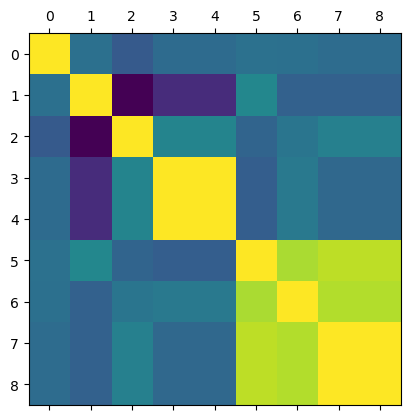

In [37]:
# Creating initial heatmap
plt.matshow(small.corr())
plt.show()

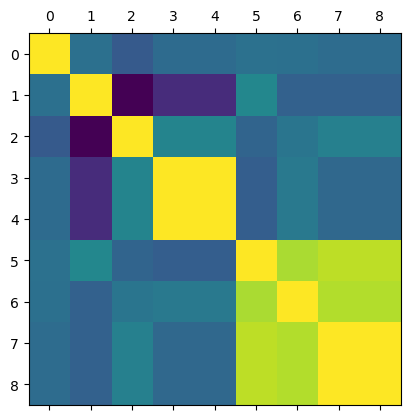

In [38]:
# Saving initial heatmap
plt.matshow(small.corr())
plt.savefig("out.png")

In [39]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Ryzen RGB Madness!!!\\Iowa Liquor Sales Analysis\\02 - Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

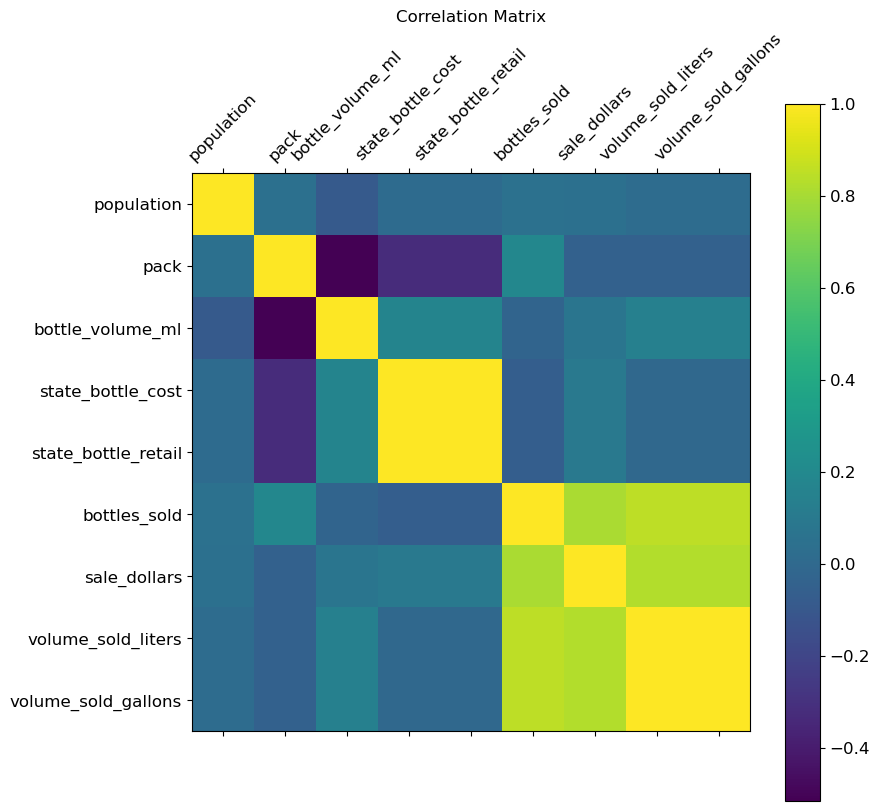

In [40]:
# Clean up the heatmap

f = plt.figure(figsize=(9, 9)) 
plt.matshow(small.corr(), fignum=f.number)
plt.xticks(range(liquor_data_exploratory.shape[1]), liquor_data_exploratory.columns, fontsize=12, rotation=45)
plt.yticks(range(liquor_data_exploratory.shape[1]), liquor_data_exploratory.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12)

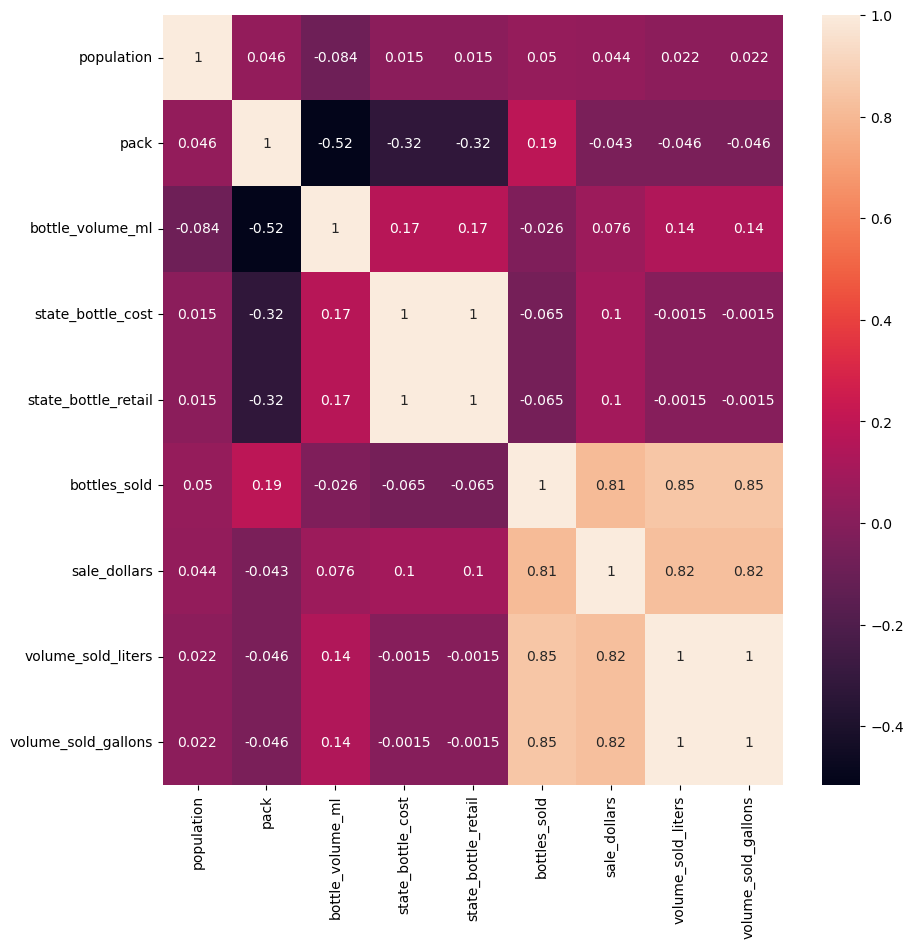

In [41]:
# Creating heatmap with seaborn

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap
corr = sns.heatmap(small.corr(), annot = True, ax = ax)

### ANALYSIS
The closer the coefficient is to 1, the stronger relation there is between the variables. I was thinking I'd see something more than just the relation between bottles sold, sale dollars, and volume sold - those three things obviously go together and you don't need a heatmap to know that. 

Looking at this, I'm not seeing a lot of other correlations that might bear further examination - most of them seem to be very weak. I think this analysis is going to focus mainly on time series and geolocational analysis. 

In [42]:
# Creating subset for pair plots
small_sub = small[['population', 'bottle_volume_ml', 'state_bottle_retail', 'bottles_sold', 'sale_dollars']] 

In [43]:
small_sub.shape

(3759903, 5)

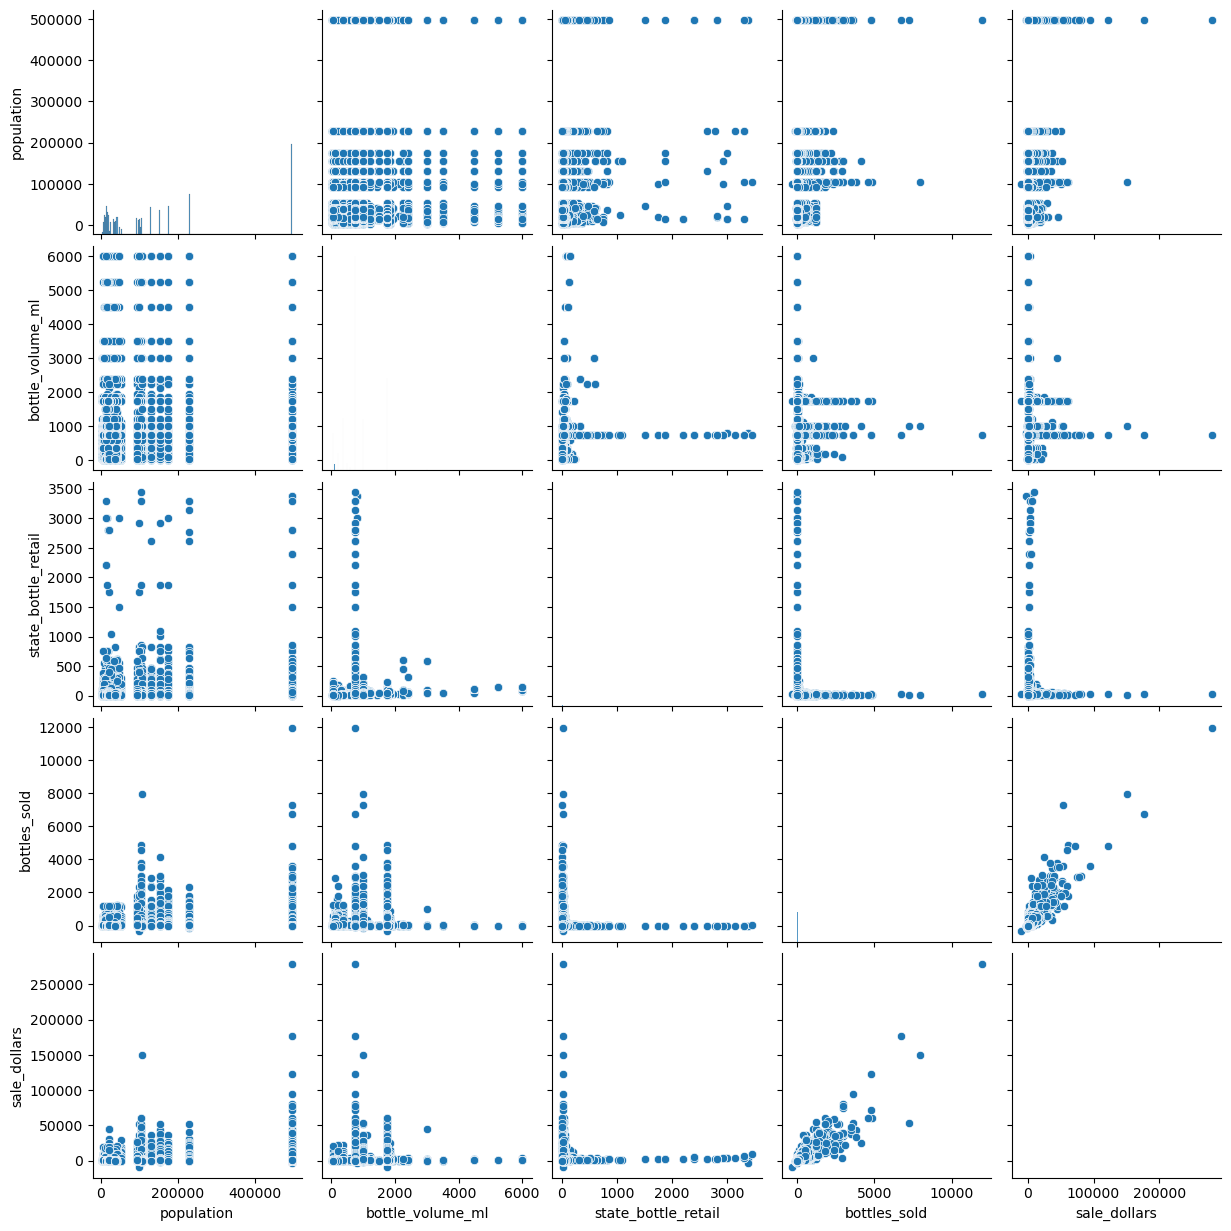

In [44]:
# Creating pair plot
g = sns.pairplot(small_sub)

### ANALYSIS
Population did not come into this as much as I was expecting it might (hence why I added it now instead of later). bottles_sold and sale_dollars go together as expected (sell a lot of bottles, you have a lot of dollars). The rest of these, nothing immediately stood out to me. 

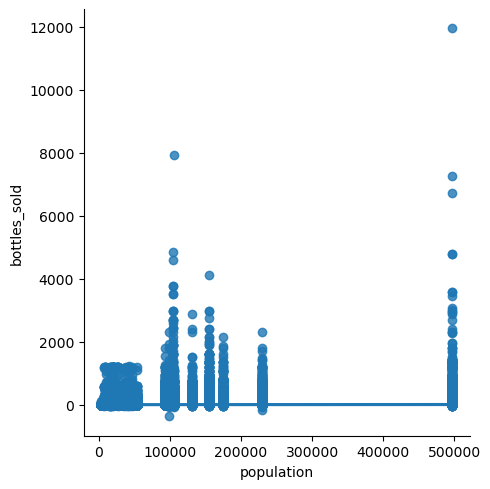

In [45]:
# Creating scatterplots
# Scatterplot for population & bottles sold

sns.lmplot(x = 'population', y = 'bottles_sold', data = small)

### ANALYSIS
Well .. at least we know the 11,979 bottle sale was in a high population county. (I still think that was selling stock to other Hy-Vee stores, which would ... maybe count as a sale depending on how Hy-Vee transfers stock.) 

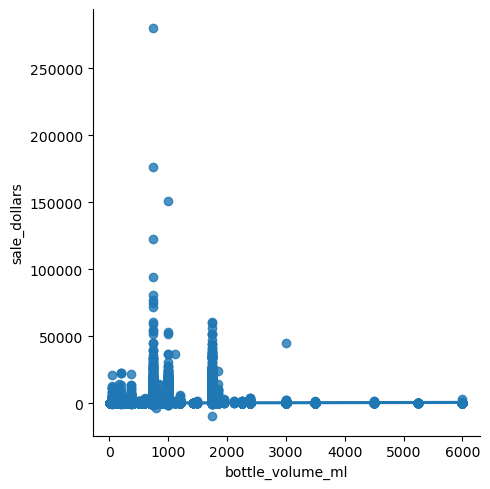

In [46]:
# Scatterplot for bottle volume and sale dollars

sns.lmplot(x = 'bottle_volume_ml', y = 'sale_dollars', data = small)

### ANALYSIS
The 27k bottle of scotch looks to be an 850ml bottle (or thereabouts). I do find it interesting that my two largest outliers (the 27k bottle of scotch and the 11,979 bottles sold) both ended up in my sample data. 

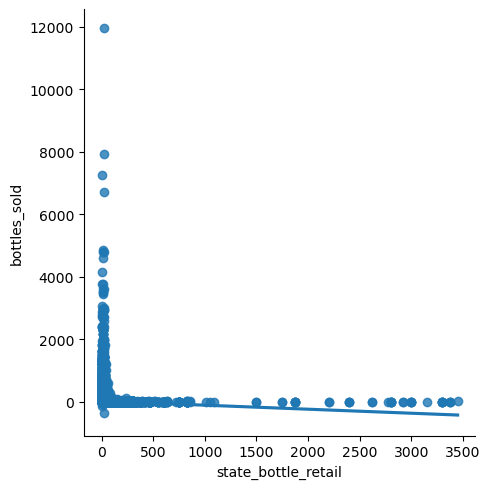

In [47]:
# Scatterplot for bottle retail price & bottles sold

sns.lmplot(x = 'state_bottle_retail', y = 'bottles_sold', data = small)

### ANALYSIS
As expected, the majority of bottles are sold in a price range that is attainable to the average person. 

<Axes: xlabel='bottle_volume_ml', ylabel='Count'>

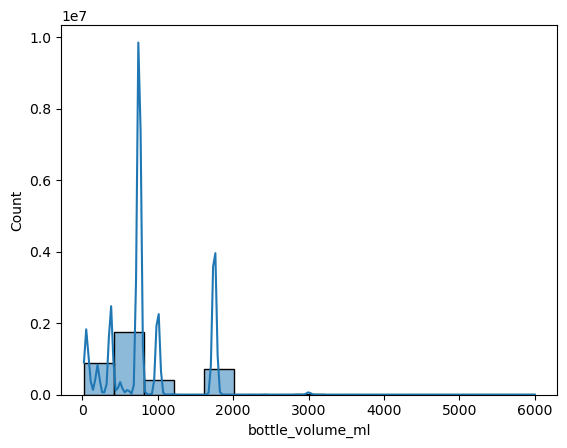

In [48]:
# Creating histogram of bottle sizes
sns.histplot(small['bottle_volume_ml'], bins = 15, kde = True)

In [49]:
# defining df for if-then
df = small

In [50]:
# Creating price range function
def bottle_size(row):
    if row['bottle_volume_ml'] < 1000:
        return 'Small bottle'
    elif (row['bottle_volume_ml'] >= 1000) and (row['bottle_volume_ml'] < 2000):
        return 'Midsize bottle'
    elif row['bottle_volume_ml'] > 2000:
        return 'Large bottle'
    else: return 'Not enough data'

In [51]:
# Applying the price range function
df['bottle_size'] = df.apply(bottle_size, axis=1)

C:\Users\Ryzen RGB Madness!!!\AppData\Local\Temp\ipykernel_7888\2981037182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bottle_size'] = df.apply(bottle_size, axis=1)


In [52]:
df['bottle_size'].value_counts(dropna = False)

bottle_size
Small bottle      2626392
Midsize bottle    1121051
Large bottle        12460
Name: count, dtype: int64

In [70]:
small.describe()

,population,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06,3.759903e+06
mean,1.620242e+05,1.215123e+01,8.495523e+02,1.099975e+01,1.650156e+01,1.144792e+01,1.541197e+02,9.284032e+00,2.447645e+00
std,1.737515e+05,7.983159e+00,5.244841e+02,1.092934e+01,1.639383e+01,3.232856e+01,5.339637e+02,3.800491e+01,1.004002e+01
min,3.654000e+03,1.000000e+00,2.000000e+01,3.300000e-01,5.000000e-01,-3.600000e+02,-9.720000e+03,-6.300000e+02,-1.664200e+02
25%,2.253500e+04,6.000000e+00,6.000000e+02,5.780000e+00,8.670000e+00,3.000000e+00,3.822000e+01,1.500000e+00,3.900000e-01
50%,9.932800e+04,1.200000e+01,7.500000e+02,8.740000e+00,1.311000e+01,6.000000e+00,8.100000e+01,4.800000e+00,1.260000e+00
75%,2.296340e+05,1.200000e+01,1.000000e+03,1.350000e+01,2.025000e+01,1.200000e+01,1.616400e+02,1.050000e+01,2.770000e+00
max,4.972540e+05,1.200000e+02,6.000000e+03,2.298840e+03,3.448260e+03,1.195200e+04,2.795573e+05,8.964000e+03,2.368030e+03


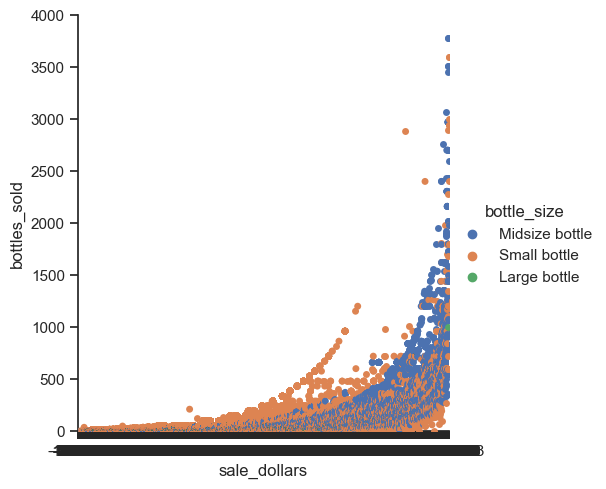

In [74]:
sns.set(style="ticks")
g = sns.catplot(x='sale_dollars', y='bottles_sold', hue='bottle_size', data=small)
g.set(ylim=(0, 4000))

### ANALYSIS
Even with specifying cutting off the y-axis before the 11,979 bottles, with the majority of bottles being under 500 dollars everything ends up being smushed together. 

After going through all of these, I'm pretty convinced that the best analysis is going to come from prediction of future sales (time-series), looking at seasonality and trends of sales (football? holidays?) and geolocation analysis (are there counties that haven't recovered to pre-pandemic levels? Are there counties that have bounced back noticeably higher?).